# Exploratory Data Analysis (Stage 1)
## Helin Yilmaz

#### Import Libraries to Use for Visualization, Data Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load cleaned dataset
df = pd.read_csv("final_dataset.csv")

# Set Seaborn style for consistency
sns.set(style="whitegrid", palette="muted")

#### Understanding the data

In [3]:
df.head()

,Unnamed: 0,official_name,level,speakers,country,missing_speakers,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use,years_since_obs
0,0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,0,3,68.819,75.7,1.0
1,1,'Ôrôê,Endangered,590,New Caledonia,0,0,0,0,0,0,1,72.719,82.0,7.0
2,2,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,0,1,83.298,93.1,1.0
3,3,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,0,2,82.354,77.3,1.0
4,4,Aasáx,Dormant,0,Tanzania,0,0,0,0,0,0,1,37.409,29.1,1.0


In [4]:
df.tail()

,Unnamed: 0,official_name,level,speakers,country,missing_speakers,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use,years_since_obs
3179,3206,Gujarati,Not Endangered,62,India,0,0,0,1,0,0,1,36.364,55.9,2.0
3180,3207,Levantine Arabic,Not Endangered,60,Algeria;Bahrain;Chad;Comoros;Cyprus;Djibouti;E...,0,0,0,0,0,0,31,100.000,100.0,1.0
3181,3208,Amharic,Not Endangered,60,Ethiopia,0,1,0,0,1,0,1,23.157,16.7,3.0
3182,3209,Kannada,Not Endangered,59,India,0,0,0,1,0,0,1,36.364,55.9,2.0
3183,3210,Sudanese Arabic,Not Endangered,52,Algeria;Bahrain;Chad;Comoros;Cyprus;Djibouti;E...,0,0,0,0,0,0,31,100.000,100.0,1.0


In [5]:
# First change: Convert 'level' to categorical for consistent order
df['level'] = pd.Categorical(df['level'], ordered=True)

#### Plot 1: Urbanization and Internet Use vs Language Endangerment
Question: Do less connected societities lose languages faster?

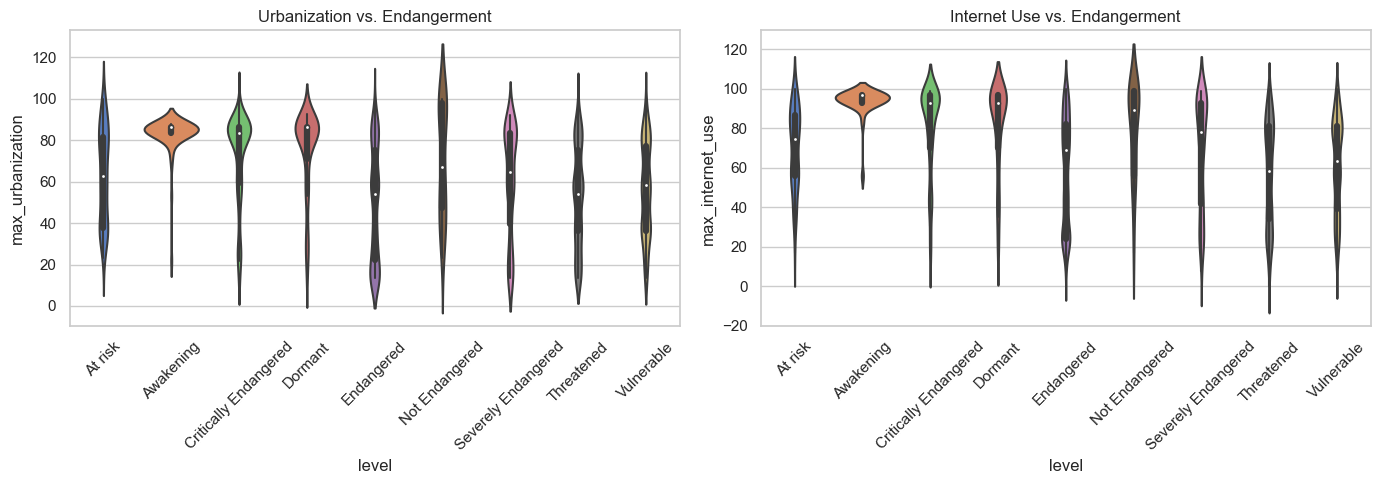

In [6]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='level', y='max_urbanization')
plt.xticks(rotation=45)
plt.title('Urbanization vs. Endangerment')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='level', y='max_internet_use')
plt.xticks(rotation=45)
plt.title('Internet Use vs. Endangerment')
plt.tight_layout()
plt.show()

The violin plots illustrate how urbanization and internet access vary across different language endangerment levels. Interestingly, the "Awakening" and "Dormant" categories tend to have both higher medians and broader distributions for max_urbanization and max_internet_use. This suggests that these languages are often found in more urbanized, digitally connected countries—possibly reflecting active revitalization efforts, archival access, or recent shifts in classification.

In contrast, languages labeled as "Vulnerable," "Endangered," or "At risk" typically cluster around lower medians for both indicators. Their narrower distributions imply that these languages are more concentrated in less connected and more rural regions, reinforcing the idea that lower infrastructure access may limit language preservation.

These findings support the inclusion of urbanization and internet use as structural, country-level predictors in our machine learning model. Sourced from World Bank indicators, they may capture environmental conditions that make a language more likely to become endangered. High-tech, high-urban contexts might foster documentation and revival, while isolation may hinder preservation efforts. Modeling these factors could improve our ability to flag at-risk languages before data or speakers disappear.

#### Plot 2: Speaker Count vs Internet Use
Question: Is tech access correlated with speaker retention?

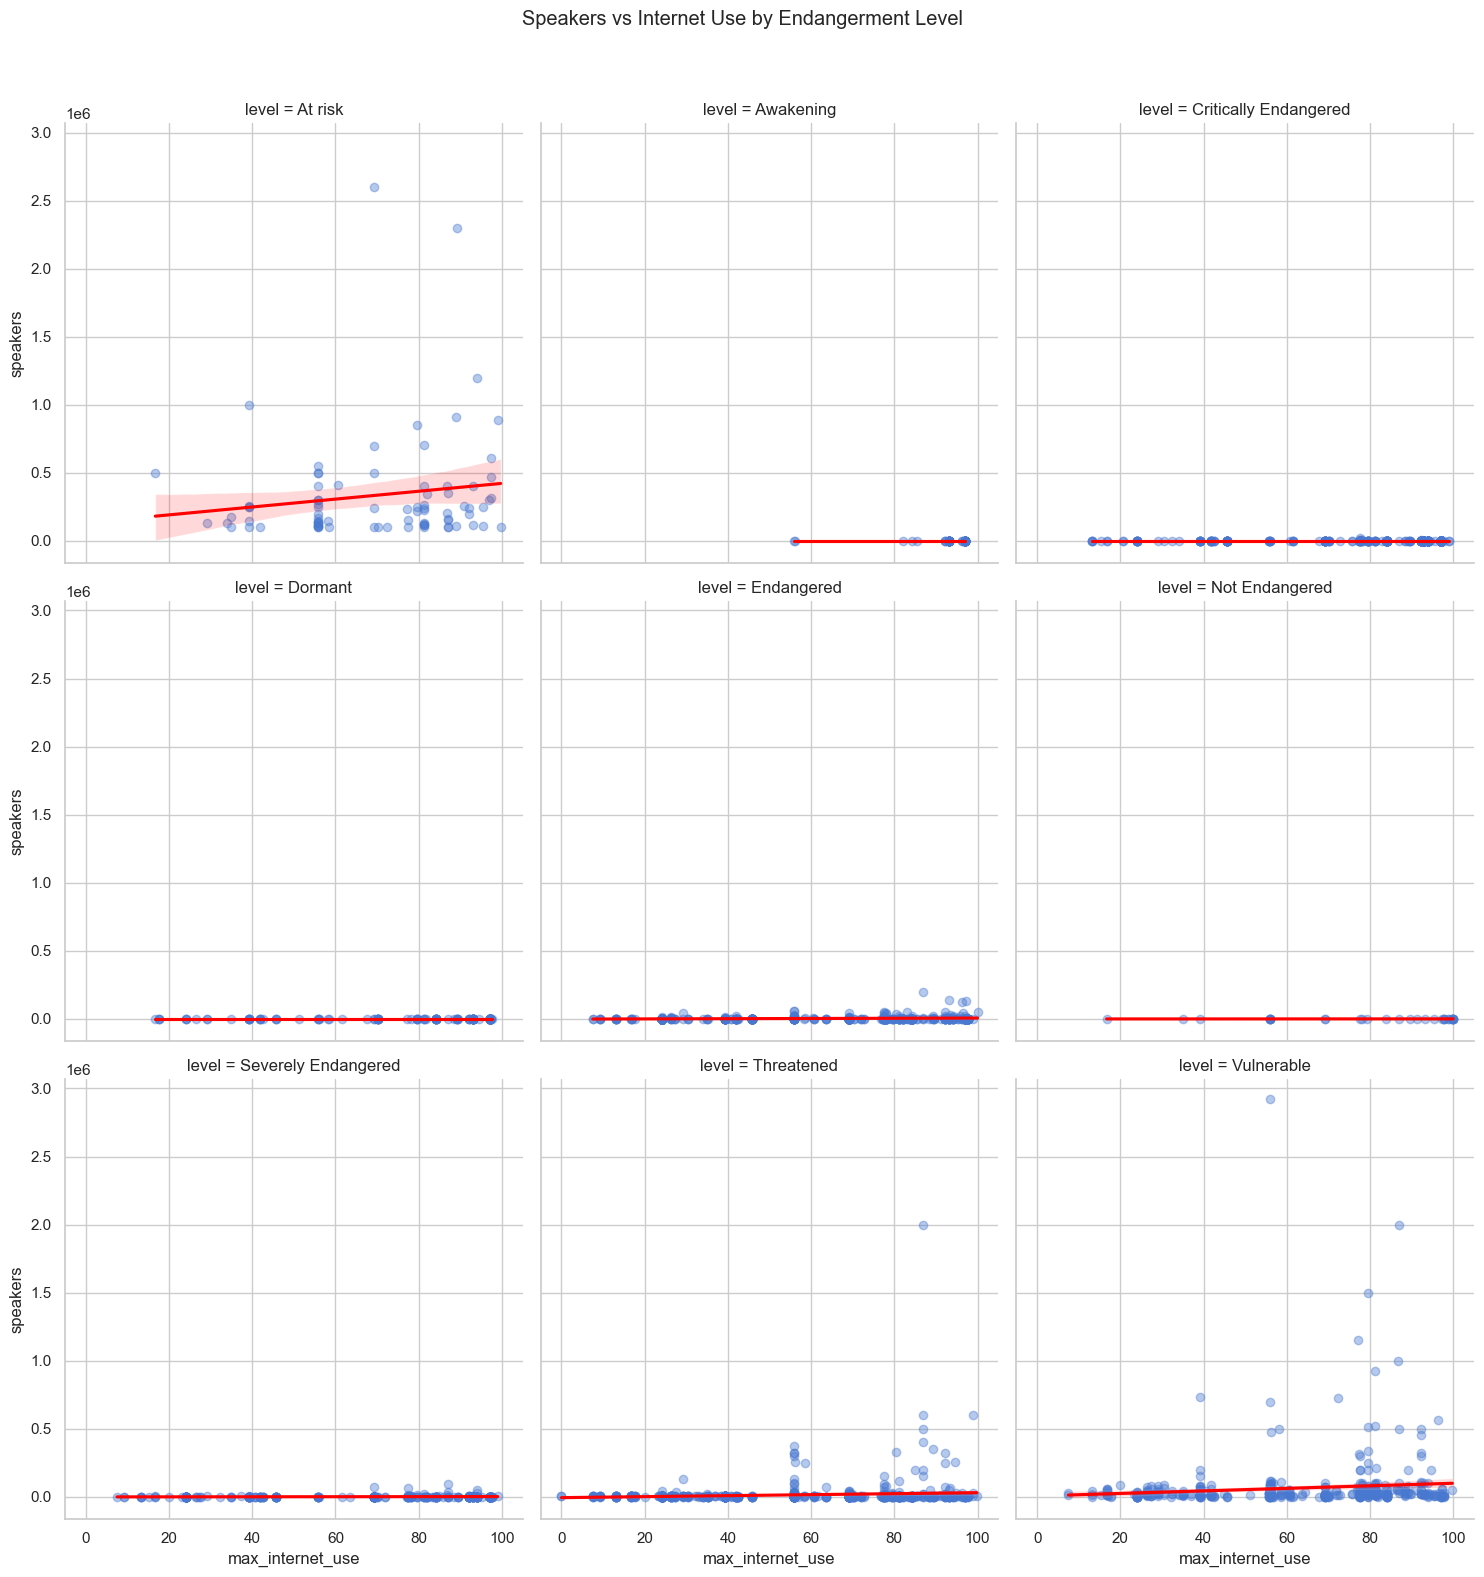

In [8]:
sns.lmplot(data=df, x='max_internet_use', y='speakers', col='level',
           col_wrap=3, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.suptitle('Speakers vs Internet Use by Endangerment Level', y=1.05)
plt.show()

#### Plot 3: Country Count vs. Endangerment
Question: Are languages that are spoken in more places less at risk?

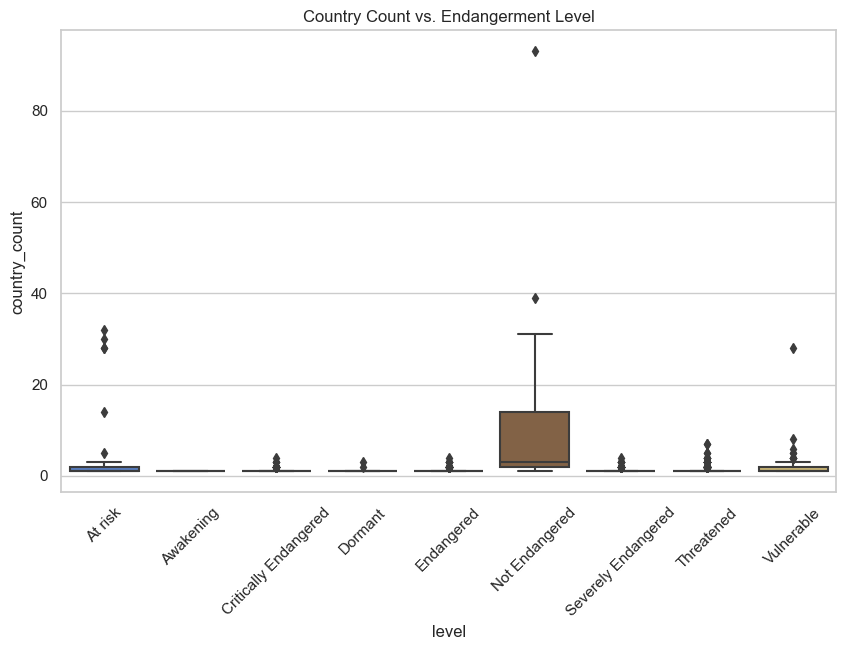

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='level', y='country_count')
plt.xticks(rotation=45)
plt.title('Country Count vs. Endangerment Level')
plt.show()

#### Plot 4: Years Since Observation
Question: Are some languages considered endangered due to having old data?

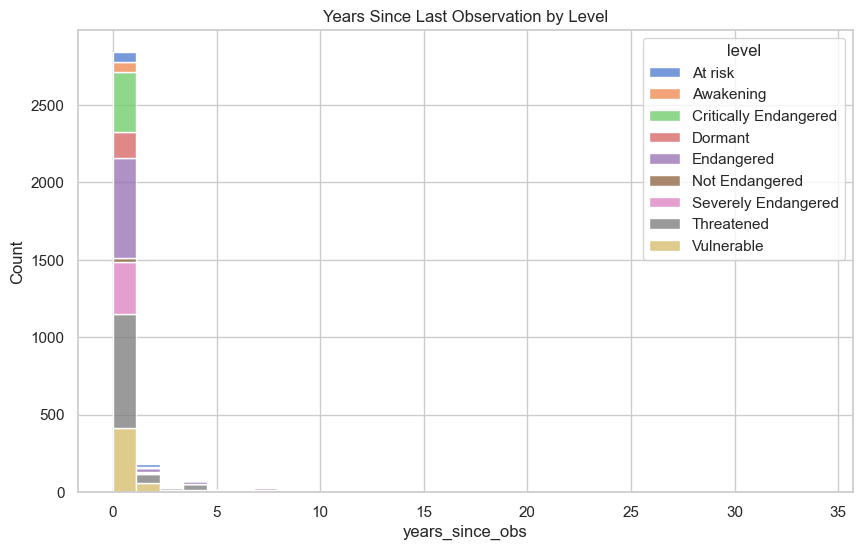

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='years_since_obs', hue='level', multiple='stack', bins=30)
plt.title('Years Since Last Observation by Level')
plt.show()

#### Plot 5: Language Status Flags vs. Endangerment
Question: Are politcally recognized languages more secure?

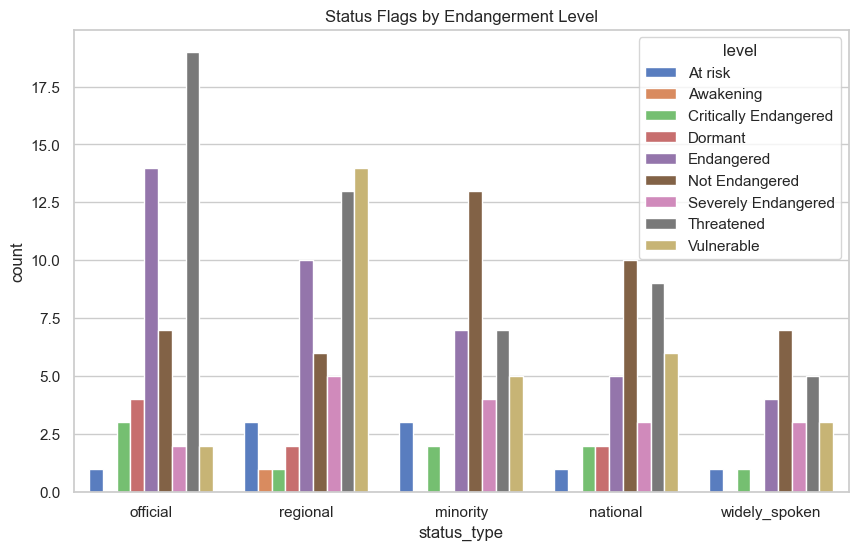

In [11]:
status_cols = ['official', 'regional', 'minority', 'national', 'widely_spoken']
df_melted = df.melt(id_vars='level', value_vars=status_cols,
                    var_name='status_type', value_name='has_status')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted[df_melted['has_status'] == 1],
              x='status_type', hue='level')
plt.title('Status Flags by Endangerment Level')
plt.show()

#### Plot 6: Speaker Count by Level
Question: Are there potential thresholds with 'Speaker Count' that correlate with Endangerment?

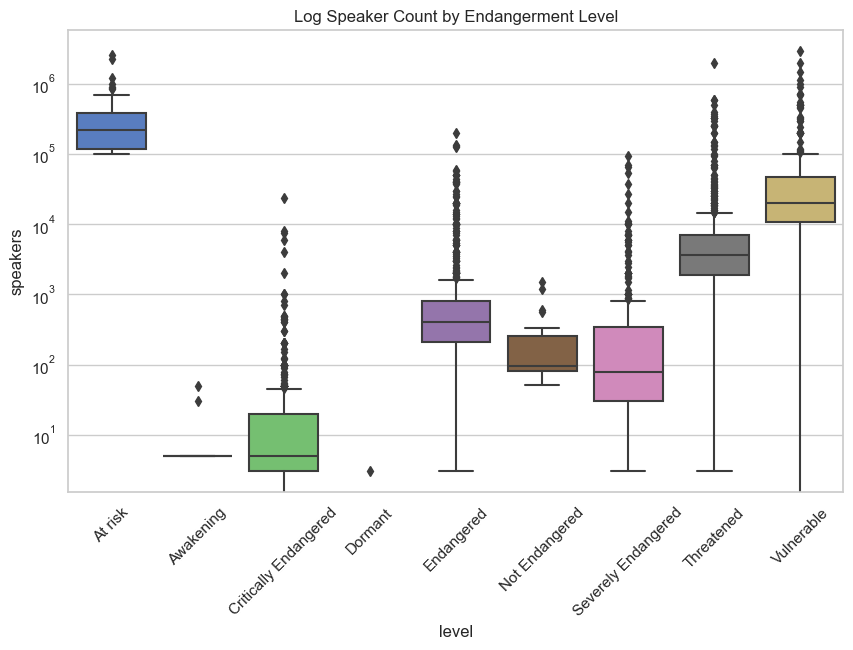

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='level', y='speakers')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Log Speaker Count by Endangerment Level')
plt.show()

#### Plot 7: Missing Speaker Data by Level
Question: Are certain levels systematically missing speaker counts?

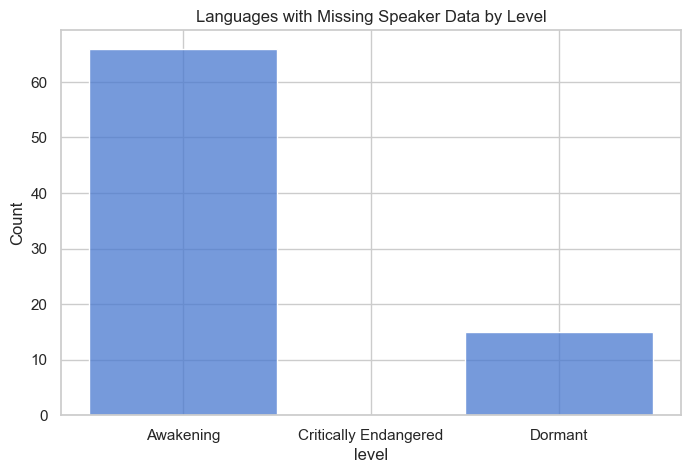

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['missing_speakers'] > 0], x='level')
plt.title('Languages with Missing Speaker Data by Level')
plt.show()


#### Plot 8: 
Question: Can languages cluster naturally into groups based on features?

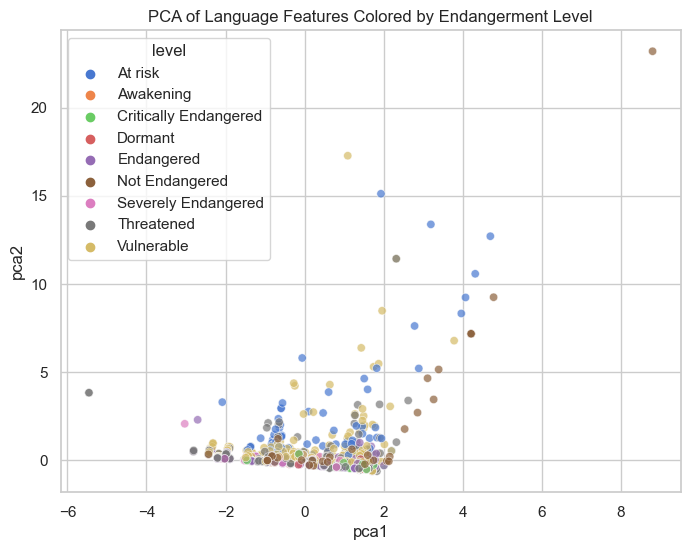

In [14]:
features = ['speakers', 'max_urbanization', 'max_internet_use',
            'years_since_obs', 'country_count']
X = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='level', alpha=0.7)
plt.title('PCA of Language Features Colored by Endangerment Level')
plt.show()